In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from skimage import io, measure
from scipy import ndimage
from skimage.color import label2rgb

In [2]:
image = io.imread('./buah.jpg')

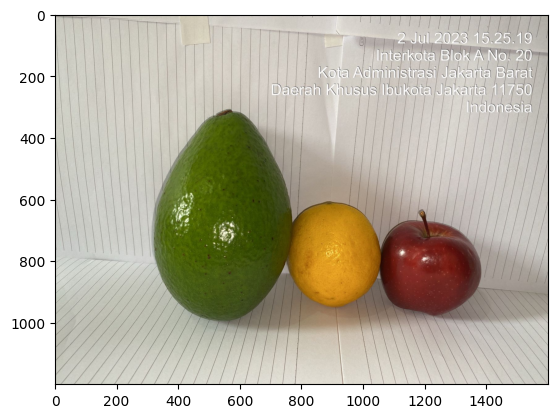

In [3]:
plt.imshow(image, cmap='gray')

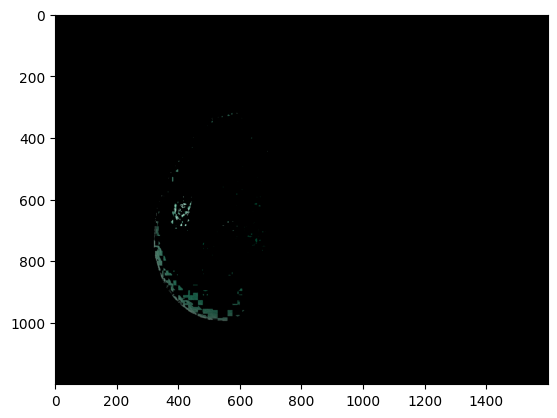

In [4]:
hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)
mask = cv.inRange(hsv, (30, 50, 50), (80, 255, 255))
green_objects = cv.bitwise_and(image, image, mask=mask)
img = cv.cvtColor(green_objects, cv.COLOR_BGR2RGB)
plt.imshow(img)

In [14]:
hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)
mask = cv.inRange(hsv, (30, 50, 50), (90, 255, 255))

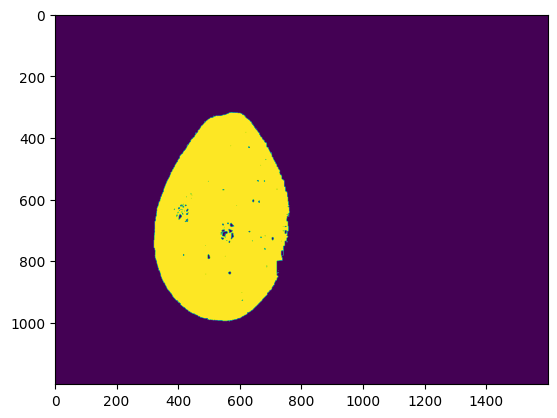

In [15]:
plt.imshow(mask)

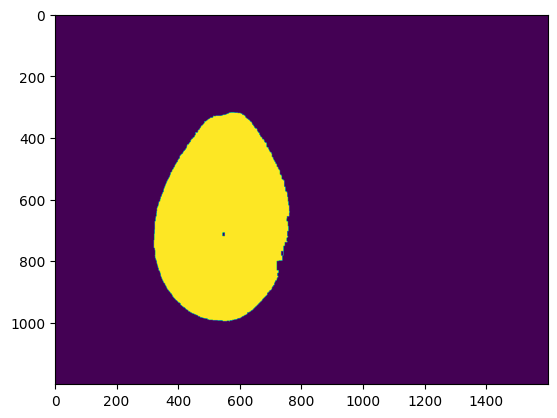

In [16]:
closed_mask = ndimage.binary_closing(mask, np.ones((7, 7)))
plt.imshow(closed_mask)

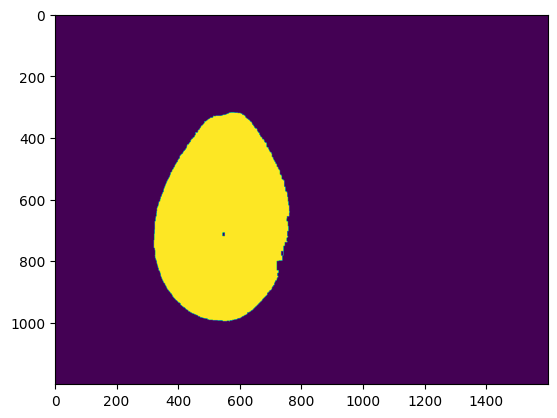

In [17]:
label_img = measure.label(closed_mask)
plt.imshow(label_img)

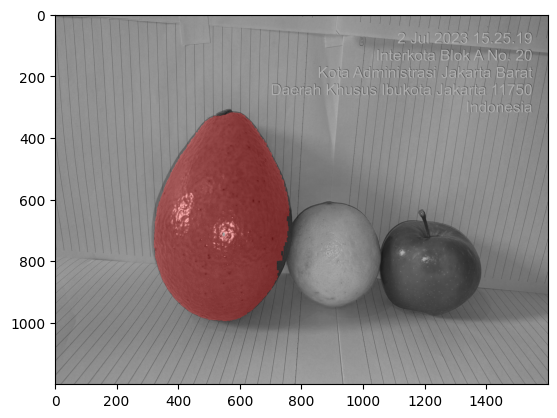

In [18]:
img_label_overlay = label2rgb(label_img, image=image)
plt.imshow(img_label_overlay)


In [19]:
img_label_overlay.shape

(1200, 1600, 3)

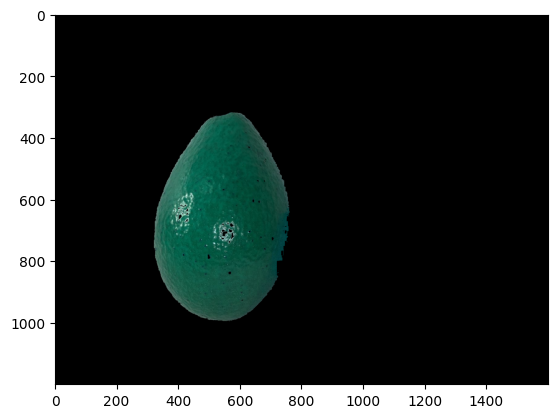

In [20]:
green_objects = cv.bitwise_and(image, image, mask=mask)
img = cv.cvtColor(green_objects, cv.COLOR_BGR2RGB)
plt.imshow(img)

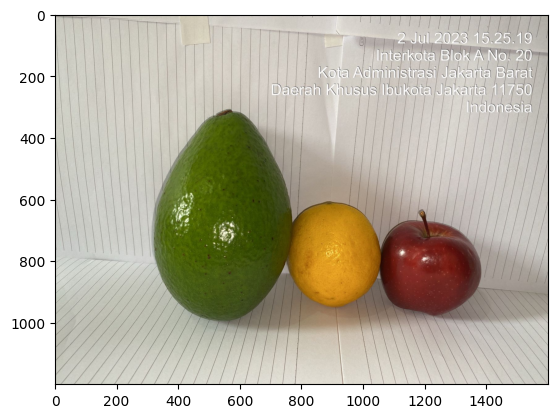

In [26]:
plt.imshow(image)

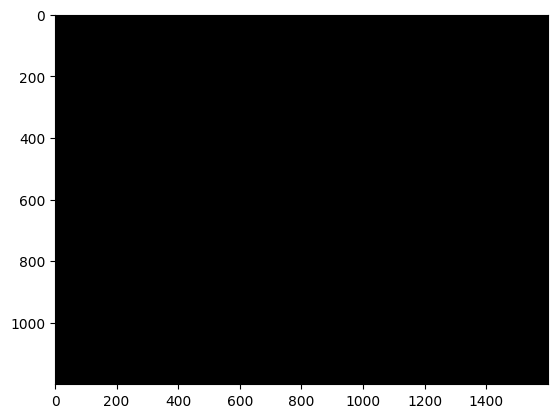

In [32]:
image = io.imread('./buah.jpg')
hsv_image = cv.cvtColor(image, cv.COLOR_BGR2HSV)

# Define lower and upper range of red color in HSV
lower_red1 = np.array([0, 100, 100])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([170, 100, 100])
upper_red2 = np.array([180, 255, 255])

# Create masks for red color ranges
mask1 = cv.inRange(hsv_image, lower_red1, upper_red1)
mask2 = cv.inRange(hsv_image, lower_red2, upper_red2)

# Combine masks to get the final red mask
final_mask = cv.bitwise_or(mask1, mask2)

# Apply the mask to the original image
red_objects = cv.bitwise_and(image, image, mask=final_mask)

plt.imshow(red_objects)

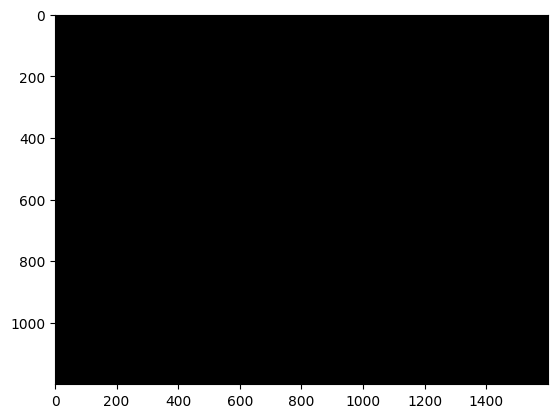

In [34]:
image = io.imread('./buah.jpg')
hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)
lower_yellow = np.array([20, 100, 100])
upper_yellow = np.array([40, 255, 255])
mask = cv.inRange(hsv_image, lower_yellow, upper_yellow)
yellow_objects = cv.bitwise_and(image, image, mask=mask)
plt.imshow(cv.cvtColor(yellow_objects, cv.COLOR_BGR2RGB))
plt.imshow(yellow_objects)

In [5]:
def overlay(image):
    hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)
    mask = cv.inRange(hsv, (30, 50, 50), (80, 255, 255))
    # closed_mask = ndimage.binary_closing(mask, np.ones((7, 7)))
    # label_img = measure.label(closed_mask)
    green_objects = cv.bitwise_and(image, image, mask=mask)
    # return label2rgb(label_img, image=image)
    return cv.cvtColor(green_objects, cv.COLOR_BGR2RGB)


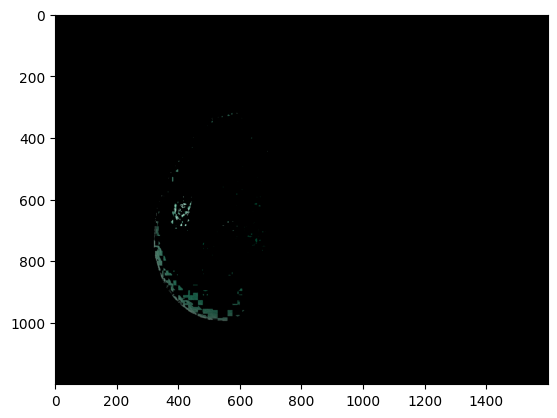

In [6]:
plt.imshow(overlay(image))

In [12]:
x = overlay(image)
x.shape

(224, 224, 3)

In [13]:
def overlay(image):
    hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)
    mask = cv.inRange(hsv, (30, 50, 50), (80, 255, 255))
    closed_mask = ndimage.binary_closing(mask, np.ones((7, 7)))
    label_img = measure.label(closed_mask)
    return label2rgb(label_img, image=image)


In [29]:
def overlay(image, color):
    hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)
    if color.lower() == 'green':
        mask = cv.inRange(hsv, (30, 50, 50), (80, 255, 255))
    elif color.lower() == 'red':
        mask1 = cv.inRange(hsv, (0, 100, 100), (10, 255, 255))
        mask2 = cv.inRange(hsv, (170, 100, 100), (180, 255, 255))
        mask = cv.bitwise_or(mask1, mask2)
    elif color.lower() == 'blue':
        mask = cv.inRange(hsv, (90, 100, 100), (130, 255, 255))
    else:
        return False

    closed_mask = ndimage.binary_closing(mask, np.ones((7, 7)))
    label_img = measure.label(closed_mask)
    return label2rgb(label_img, image=image)


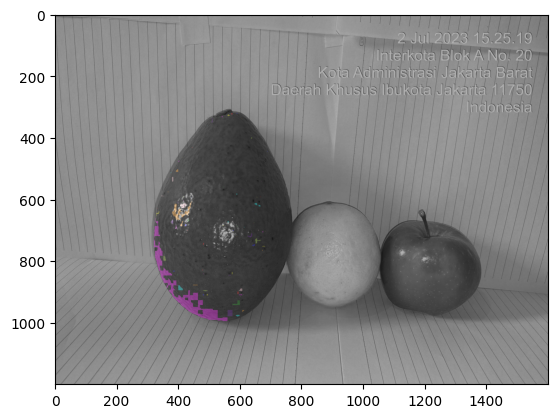

In [31]:
plt.imshow(overlay(image, 'green'))